---
# Práctica 1. Sistema difuso con Mamdani
---

In [1]:
from simpful import *

In [2]:
s_difuso_1 = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.10.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Vamos a definir cada una de los conjuntos difusos y sus variables lingüísticas asociadas.
Posteriormente aplicaremos diferentes variables de entrada al sistema

In [3]:
# Creamos los conjuntos difusos para la variable "Servicio"
# Definimos los intervalos y tipos de función apra cada conjunto
Se1 = FuzzySet(function=Crisp_MF(a=0,b=4), term="malo")
Se2 = FuzzySet(function=Trapezoidal_MF(a=3, b=3.5, c=6,d=6.5), term="regular")
Se3 = FuzzySet(function=Trapezoidal_MF(a=6, b=6.5, c=8, d=8.5), term="bueno")
Se4 = FuzzySet(function=Triangular_MF(a=7.75, b=10, c=10), term="excelente")

# Definimos los extremos entre los que está la variable lingüística.
rango_se = [0,10]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_se = LinguisticVariable([Se1,Se2,Se3,Se4], concept="Calidad del servicio", universe_of_discourse=rango_se)
s_difuso_1.add_linguistic_variable("Servicio", lv_se )

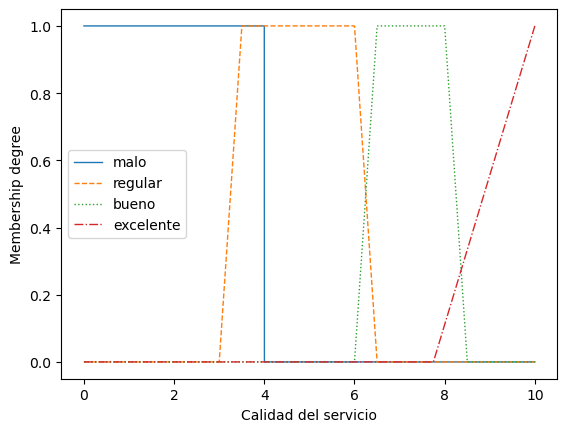

In [4]:
s_difuso_1.plot_variable("Servicio")

In [5]:
# Creamos los conjuntos difusos para la variable "Comida"
# Definimos los intervalos y tipos de función apra cada conjunto
Co1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="rancia")
Co2 = FuzzySet(function=Trapezoidal_MF(a=4, b=5, c=7, d=7.5), term="apetecible")
Co3 = FuzzySet(function=Triangular_MF(a=7, b=10, c=10), term="deliciosa")

# Definimos los extremos entre los que está la variable lingüística.
rango_co = [0,10]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_co = LinguisticVariable([Co1, Co2, Co3], concept="Calidad de la comida", universe_of_discourse=rango_co)
s_difuso_1.add_linguistic_variable("Comida", lv_co)

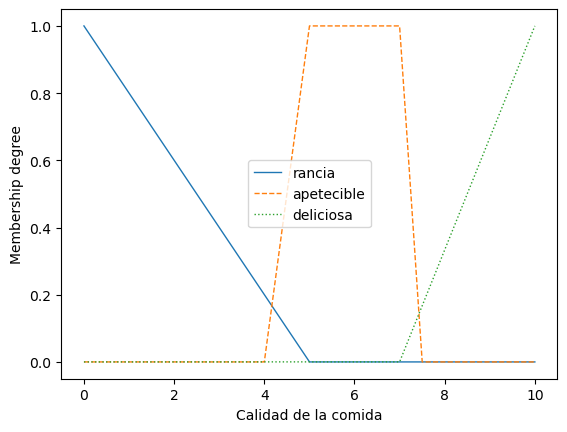

In [6]:
s_difuso_1.plot_variable("Comida")

In [7]:
# Definimos la variable de salida "Propina" por medio de sus conjuntos difusos
Pr1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="baja")
Pr2 = FuzzySet(function=Triangular_MF(a=3, b=10, c=20), term="normal")
Pr3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generosa")

# Los extremos de la variable lingüística en este caso serán entre 0 y 20 (€)
rango_pr = [0,25]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_pr = LinguisticVariable([Pr1, Pr2, Pr3], universe_of_discourse=rango_pr)
s_difuso_1.add_linguistic_variable("Propina", lv_pr)

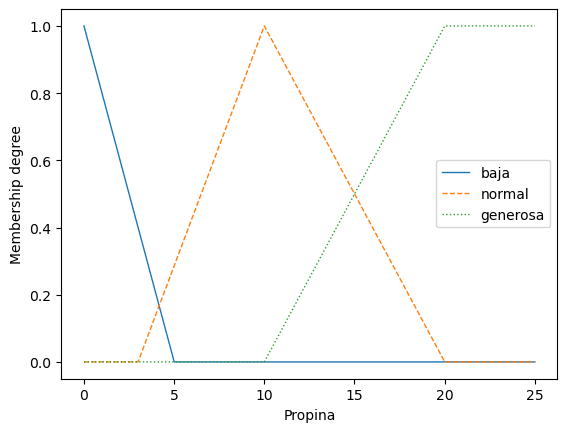

In [8]:
s_difuso_1.plot_variable("Propina")

In [9]:
# Definición de las reglas difusas
RULES = []
R1 = "IF ((Servicio IS malo) OR (Servicio IS regular)) AND (Comida IS rancia)  THEN (Propina IS baja)"
R2 = "IF (Servicio IS excelente) AND (Comida IS deliciosa) THEN (Propina IS generosa)"
R3 = "IF (Servicio IS regular) AND (Comida IS deliciosa) THEN (Propina IS normal)"
RULES.extend([R1,R2, R3])

In [10]:
s_difuso_1.add_rules(RULES)

In [11]:
s_difuso_1.set_variable("Servicio", 3)
s_difuso_1.set_variable("Comida", 2)
print(s_difuso_1.Mamdani_inference())

{'Propina': 1.8505121391062516}


In [12]:
s_difuso_1.set_variable("Servicio", 10)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 19.59010549203194}


---
## Ejercicios
---

## Ejercicio 1

¿Qué ocurre si ejecutamos el siguiente código?¿Por qué? ¿Cómo se podría solucionar?

In [13]:
s_difuso_1.set_variable("Servicio", 0)

s_difuso_1.set_variable("Comida", 5.5)

print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


#### Respuesta ejercicio 1

Añadiendo una nueva regla

In [14]:
R4 = "IF (Servicio IS malo) AND (Comida IS apetecible) THEN (Propina IS baja)"
RULES.extend([R4])
s_difuso_1.add_rules(RULES)

s_difuso_1.set_variable("Servicio", 0)

s_difuso_1.set_variable("Comida", 5.5)

print(s_difuso_1.Mamdani_inference())

{'Propina': 1.6583382984180601}


### Ejercicio 2

¿Si quiero crear una regla que especifique que si el servicio es malo y la comida deliciosa, la propina ha de ser normal? ¿Que podríamos hacer?

In [15]:
s_difuso_1.set_variable("Servicio", 0)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


#### Respuesta ejercicio 2

Agregar una nueva regla

In [16]:
R5 = "IF (Servicio IS malo) AND (Comida IS deliciosa) THEN (Propina IS normal)"
RULES.extend([R5])
s_difuso_1.add_rules(RULES)

s_difuso_1.set_variable("Servicio", 0)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 11.000003009021041}


### Ejercicio 3

¿Qué ocurrirá si no solucionamos el problema propuesto en el ejercicio 1, pero si el propuesto en el ejericicio 2?
Compruébalo con:
* Servicio = 3
* Comida = 10

In [17]:
s_difuso_1.set_variable("Servicio", 3)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 11.000003009021041}


Da el mismo resultado por que no le asigna diferentes pesos

### Ejercicio 4 (Opcional)

¿Qué otras reglas podríamos añadir para que se cubriera todo el espectro de las variables de entrada definidas?

In [18]:
# buscamos cuales fallan: 
import warnings
warnings.filterwarnings('ignore')

def comprueba_fallos():
    fallos = []
    for i in range(11):
        for j in range(11):
            s_difuso_1.set_variable("Servicio", i)
            s_difuso_1.set_variable("Comida", j)
            if s_difuso_1.Mamdani_inference(ignore_warnings=True)['Propina']==0:
                #print(f"{i}-{j}", s_difuso_1.Mamdani_inference(ignore_warnings=True))
                fallos.append(f"{i}-{j}")
    return fallos
            
print(comprueba_fallos())

['5-5', '5-6', '5-7', '6-5', '6-6', '6-7', '7-0', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6', '7-7', '7-8', '7-9', '7-10', '8-0', '8-1', '8-2', '8-3', '8-4', '8-5', '8-6', '8-7', '9-0', '9-1', '9-2', '9-3', '9-4', '9-5', '9-6', '9-7', '10-0', '10-1', '10-2', '10-3', '10-4', '10-5', '10-6', '10-7']


In [19]:
R6 = "IF (Servicio IS regular) AND (Comida IS apetecible) THEN (Propina IS normal)"
R7 = "IF ((Servicio IS bueno) OR (Servicio IS excelente))  AND (Comida IS rancia) THEN (Propina IS baja)"
R8 = "IF ((Servicio IS bueno) OR (Servicio IS excelente))  AND (Comida IS apetecible) THEN (Propina IS normal)"
R9 = "IF (Servicio IS bueno)  AND (Comida IS deliciosa) THEN (Propina IS generosa)"
RULES.extend([R6, R7, R8, R9])
s_difuso_1.add_rules(RULES)

In [20]:
print(comprueba_fallos())

[]


### Ejercicio 5 (Opcional)

¿Qué ocurre si ponemos “servicio=-1”? ¿Y “servicio=15”?

In [21]:
s_difuso_1.set_variable("Servicio", -1)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


In [22]:
R11 = "IF (Comida IS deliciosa) THEN (Propina IS normal)  WEIGHT 0.01"
RULES.extend([R11])
s_difuso_1.add_rules(RULES)
s_difuso_1.set_variable("Servicio", -1)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 11.492761552852627}


In [23]:
s_difuso_1.set_variable("Servicio", 15)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 19.499335426488788}
